# Social Media Content Performance & Growth Analysis

## Project Overview

**Objective**: Analyze Instagram post performance data to identify key drivers of engagement, reach, and audience growth, and provide data-driven recommendations to optimize content strategy.

## Data Understanding

In [2]:
#import required libraries
import pandas as pd
import numpy as np

In [3]:
#send display setting on pandas to view all columns without be hidden or truncated
pd.set_option('display.max_columns',None)

In [4]:
#load the dataset
df = pd.read_csv("../Data/raw_instagram_data.csv")

In [6]:
#inspect dataset shape
df.shape

(29999, 23)

In [7]:
#view the dataset
df.head()

,post_id,account_id,account_type,follower_count,media_type,content_category,traffic_source,has_call_to_action,post_datetime,post_date,post_hour,day_of_week,likes,comments,shares,saves,reach,impressions,engagement_rate,followers_gained,caption_length,hashtags_count,performance_bucket_label
0,IG0000001,7,brand,3551,reel,Technology,Home Feed,1,2024-11-30 06:00,2024-11-30,6,Saturday,194,5,7,34,4327,6230,0.0385,899,100,7,medium
1,IG0000002,20,creator,31095,image,Fitness,Hashtags,1,2025-08-15 15:00,2025-08-15,15,Friday,449,10,21,68,7451,8268,0.0663,805,122,5,viral
2,IG0000003,15,brand,8167,reel,Beauty,Reels Feed,0,2025-09-11 16:00,2025-09-11,16,Thursday,114,2,1,22,1639,2616,0.0531,758,115,8,high
3,IG0000004,11,creator,9044,carousel,Music,External,0,2025-09-18 03:00,2025-09-18,3,Thursday,91,0,7,0,2877,3171,0.0309,402,115,7,medium
4,IG0000005,8,creator,15986,reel,Technology,Profile,0,2025-03-21 09:00,2025-03-21,9,Friday,154,8,5,21,5350,8503,0.0221,155,112,9,low


In [8]:
#view data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   post_id                   29999 non-null  object 
 1   account_id                29999 non-null  int64  
 2   account_type              29999 non-null  object 
 3   follower_count            29999 non-null  int64  
 4   media_type                29999 non-null  object 
 5   content_category          29999 non-null  object 
 6   traffic_source            29999 non-null  object 
 7   has_call_to_action        29999 non-null  int64  
 8   post_datetime             29999 non-null  object 
 9   post_date                 29999 non-null  object 
 10  post_hour                 29999 non-null  int64  
 11  day_of_week               29999 non-null  object 
 12  likes                     29999 non-null  int64  
 13  comments                  29999 non-null  int64  
 14  shares

In [9]:
#missing values check
df.isna().sum().sort_values(ascending=False)

post_id                     0
likes                       0
hashtags_count              0
caption_length              0
followers_gained            0
engagement_rate             0
impressions                 0
reach                       0
saves                       0
shares                      0
comments                    0
day_of_week                 0
account_id                  0
post_hour                   0
post_date                   0
post_datetime               0
has_call_to_action          0
traffic_source              0
content_category            0
media_type                  0
follower_count              0
account_type                0
performance_bucket_label    0
dtype: int64

Based on initial inspection, the dataset contains the following key groups of variables:

**Engagement Metrics**
- Likes
- Comments
- Shares
- Saves

**Exposure Metrics**
- Reach
- Impressions

**Content Metadata**
- Media type (e.g., image, video, reel)
- Content category
- Caption length
- Hashtag count

**Time Features**
- Post timestamp

**Performance Label**
- Post performance category (Low, Medium, High, Viral)

These variables will be used to analyze what drives higher engagement and content growth.

## Data Cleaning

In [10]:
#datetime conversion
df["post_datetime"] = pd.to_datetime(df["post_datetime"])

In [11]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
df = df.drop_duplicates()

In [15]:
#numeric value validation (engagement metrics & reach metrics > 0)
numeric_cols = ['likes', 'comments', 'shares', 'saves', 'reach', 'impressions', 'followers_gained']
(df[numeric_cols] < 0).sum()

likes               0
comments            0
shares              0
saves               0
reach               0
impressions         0
followers_gained    0
dtype: int64

ensured that engagement & reach metrics do not contain invalid negative values.

all column names follow snake_case formatting and are consistent with python. no renaming required.

In [16]:
#save cleaned dataset
df.to_csv("../Data/cleaned_instagram_data.csv", index=False)

# Feature Engineering

#### Time-Based Features

In [17]:
#get only hours
df["post_hour"] = df["post_datetime"].dt.hour

In [18]:
#get only day name
df["day_of_week"] = df["post_datetime"].dt.day_name()

In [19]:
#checks is it weekend or not
df["is_weekend"] = df["post_datetime"].dt.dayofweek.isin([5,6]).astype(int)

#### Total Engagement Feature

- combines all direct user interations to measure overall post impact

In [20]:
df["total_engagement"] = df["likes"] + df["comments"] + df["shares"] + df["saves"]

#### Engagement Rate Per Follower

#### Engagement Rate Per Follower

- evaluates how effeiciency a post engages an account's audience, independent of follower count.

In [21]:
df["engagement_rate_per_follower"] = df["total_engagement"] / df["follower_count"]

in here not multiplied by 100. ratio format is better for bi tools.

#### Validate newly created Features

In [23]:
df[['post_hour', 'day_of_week', 'is_weekend', 'total_engagement', 'engagement_rate_per_follower']].head()

,post_hour,day_of_week,is_weekend,total_engagement,engagement_rate_per_follower
0,6,Saturday,1,240,0.067587
1,15,Friday,0,548,0.017623
2,16,Thursday,0,139,0.017020
3,3,Thursday,0,98,0.010836
4,9,Friday,0,188,0.011760


# Exploratory Data Analysis (EDA)

## Overall Performance Overview

#### Distribution of Engagement Metrics

- understanding the distrivution of likes, comments, shares and saves helps identify typical perfomance levels and outliers.

In [25]:
#import required visualization lbraries
import matplotlib.pyplot as plt
import seaborn as sns

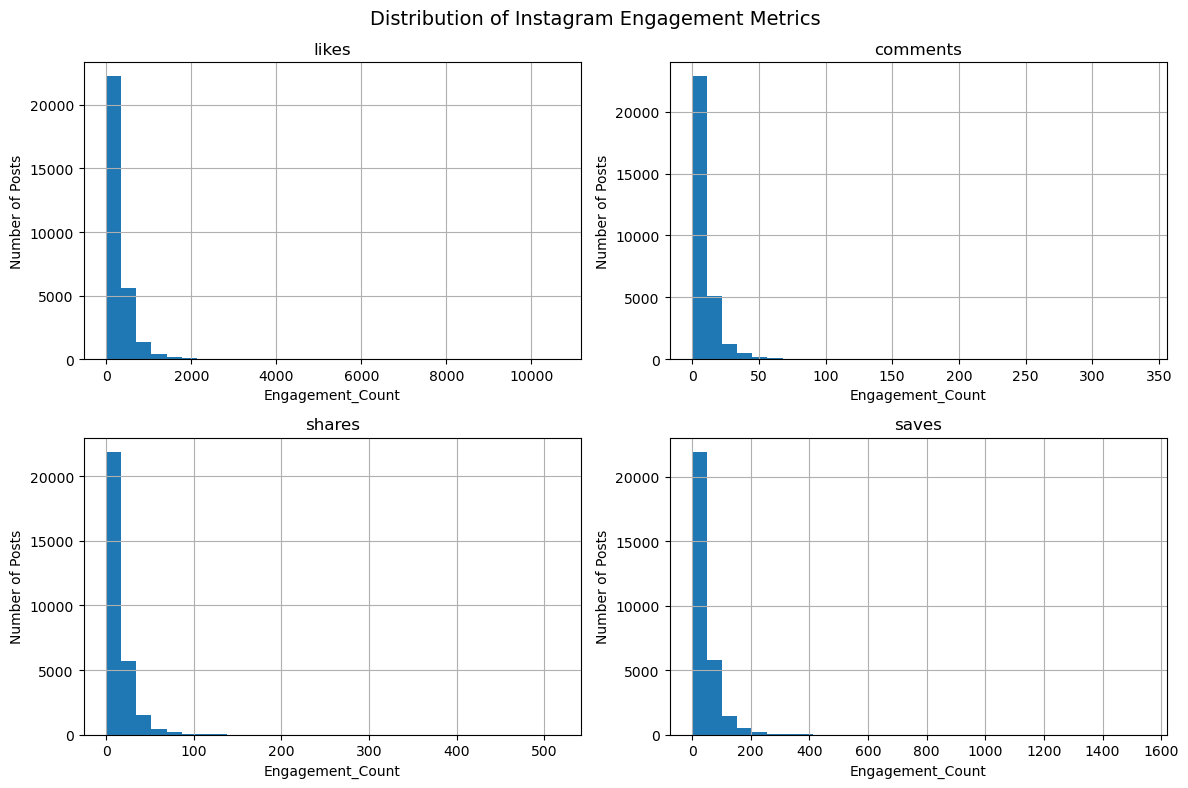

In [41]:
#visualization
engagement_cols = ['likes', 'comments', 'shares', 'saves']
axes = df[engagement_cols].hist(bins=30, figsize = (12,8), grid=True)
plt.suptitle("Distribution of Instagram Engagement Metrics", fontsize = 14)

for ax in axes.flatten():          #df.hist() returns to 2d array..so to make it as a list we use .flatten() for loop
    ax.set_xlabel("Engagement_Count")
    ax.set_ylabel("Number of Posts")

plt.tight_layout()
plt.show()

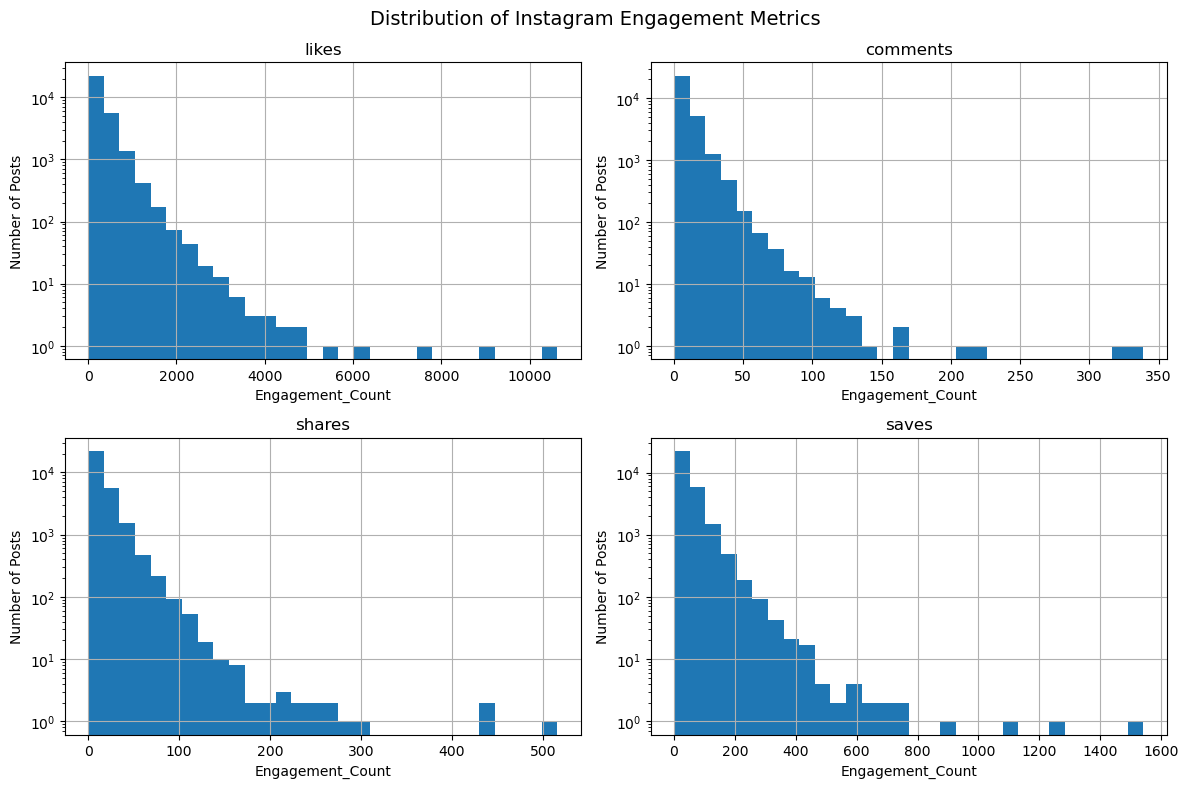

In [37]:
#visualization
engagement_cols = ['likes', 'comments', 'shares', 'saves']
axes = df[engagement_cols].hist(bins=30, figsize = (12,8), grid=True, log=True)
plt.suptitle("Distribution of Instagram Engagement Metrics", fontsize = 14)

for ax in axes.flatten():          #df.hist() returns to 2d array..so to make it as a list we use .flatten() for loop
    ax.set_xlabel("Engagement_Count")
    ax.set_ylabel("Number of Posts")

plt.tight_layout()
plt.show()

#### Engagement Rate Distribution

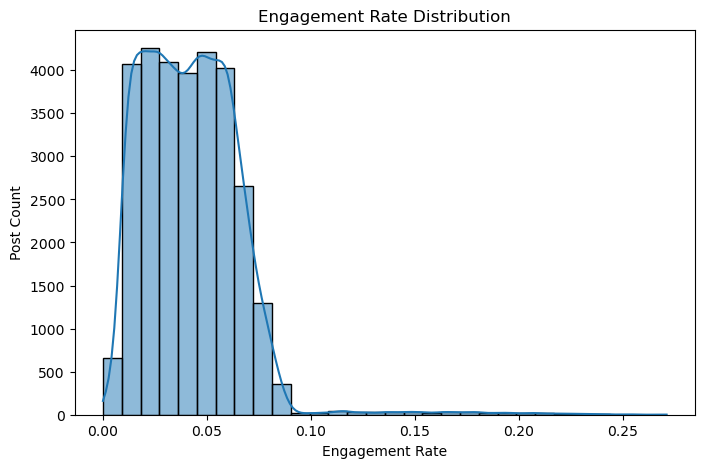

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(df["engagement_rate"], bins=30, kde=True)
plt.title("Engagement Rate Distribution")
plt.xlabel("Engagement Rate")
plt.ylabel("Post Count")
plt.show()

#### Reach vs impression Relashionship

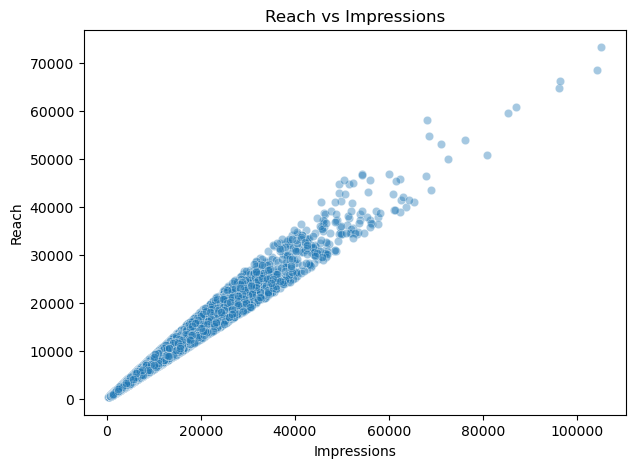

In [43]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="impressions", y="reach", alpha=0.4)
plt.title("Reach vs Impressions")
plt.xlabel("Impressions")
plt.ylabel("Reach")
plt.show()

**Observations:**
- Engagement metrics show right-skewed distributions, indicating a small number of high-performing posts.
- Engagement rate is concentrated at lower values, with a long tail of highly engaging posts.
- Reach and impressions exhibit a strong positive relationship, suggesting broader exposure increases unique reach.

## Content Analysis

#### Engagement by Media Type

- comparing total engagement across different media formats.

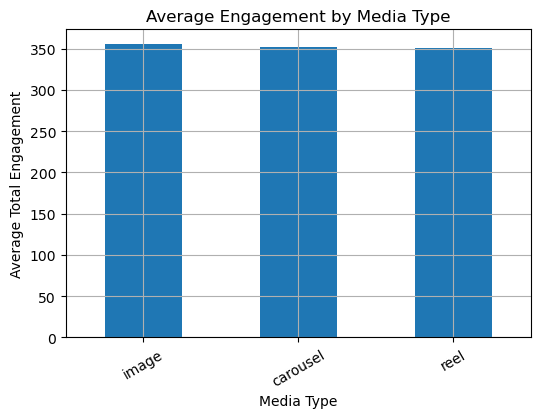

In [57]:
media_engagement = df.groupby('media_type')['total_engagement'].mean().sort_values(ascending=False)

media_engagement.plot(kind='bar', figsize=(6,4), grid=True)
plt.title("Average Engagement by Media Type")
plt.ylabel("Average Total Engagement")
plt.xlabel("Media Type")
plt.xticks(rotation=30)
plt.show()

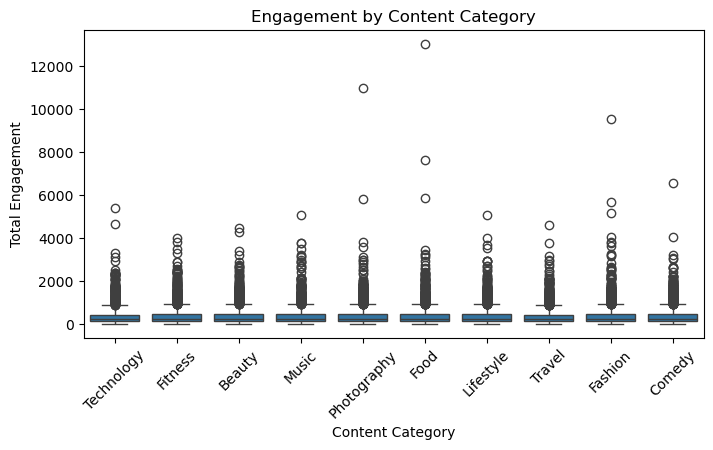

In [54]:
#### Engagement by Content Category
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='content_category', y='total_engagement')
plt.xticks(rotation=45)
plt.title("Engagement by Content Category")
plt.ylabel("Total Engagement")
plt.xlabel("Content Category")
plt.show()

**Content Analysis - Key Observations**

- Engagement levels are similar across images, carousels, and reels, indicating that media format alone does not drive performance.
- Images show a slight average engagement advantage, but not enough to favor a single format strategy.
- Engagement varies significantly by content category, with Food, Photography, and Fashion showing higher viral potential due to extreme high-performing posts.
- Technology and Beauty content tends to be more consistent but less likely to go viral.
- Overall, content quality and relevance matter more than format or category alone.

## Timing Analysis

- evaluating how engagement varies by time of day.

#### Engagement by Posting Hour

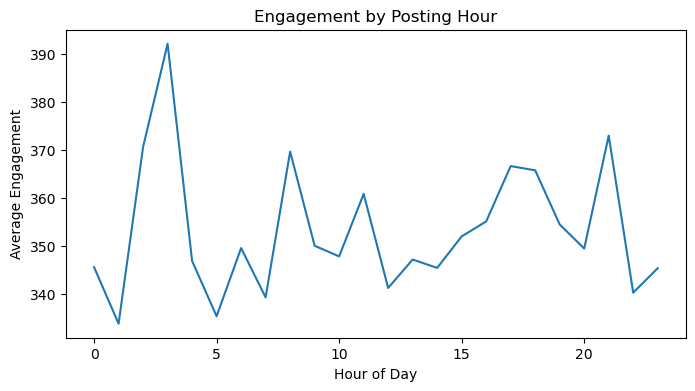

In [58]:
hourly_engagement = df.groupby('post_hour')['total_engagement'].mean()

hourly_engagement.plot(figsize=(8,4))
plt.title("Engagement by Posting Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Engagement")
plt.show()

#### Engagement by Day of Week

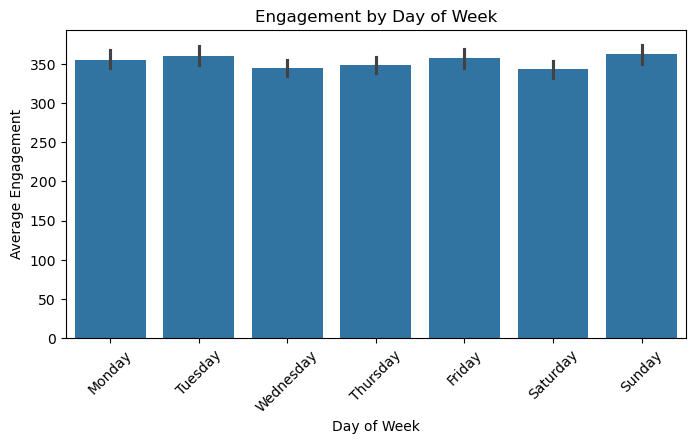

In [63]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8,4))
sns.barplot(data=df, x='day_of_week', y='total_engagement', order=order)

plt.title("Engagement by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Engagement")
plt.xticks(rotation=45)
plt.show()

**Timing Analysis - Key Observations**

- Engagement varies by posting hour, showing clear audience activity patterns.
- Early morning (3–4 AM) and evening (6–9 PM) posts tend to perform better.
- Engagement is fairly consistent across weekdays, with slightly higher activity on Sunday and Tuesday.
- Saturday shows slightly lower engagement.
- Overall, posting at the right time can improve engagement without changing content.

## Caption and Hashtag Analysis

#### Caption Length vs Engagement

- explore whether longer captions drive higher engagement.

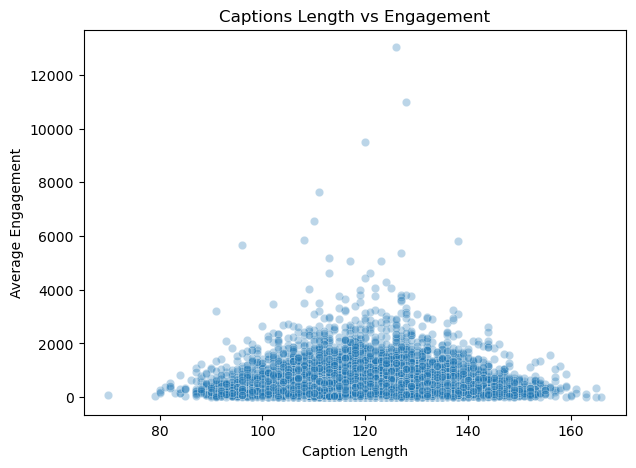

In [65]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='caption_length', y='total_engagement', alpha=0.3)

plt.title("Captions Length vs Engagement")
plt.xlabel("Caption Length")
plt.ylabel("Average Engagement")
plt.show()

#### Hashtag Count vs Reach

- analyze the impact of hashtag usage on reach

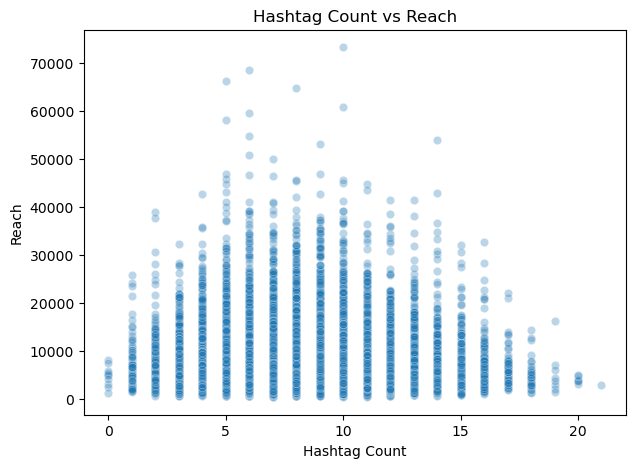

In [67]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='hashtags_count', y='reach', alpha=0.3)

plt.title("Hashtag Count vs Reach")
plt.xlabel("Hashtag Count")
plt.ylabel("Reach")
plt.show()

**Caption & Hashtag Analysis – Key Observations**

- Caption length shows no strong linear relationship with engagement extremely long captions do not consistently perform better.
- Most high-engagement posts fall within a moderate caption length range, suggesting clarity over length.
- Hashtag usage has a positive impact on reach up to an optimal range.
- Posts with a moderate number of hashtags achieve higher reach than those with very few or excessive hashtags.
- Overall, balanced captions and strategic hashtag usage are more effective than maximizing quantity.

## Traffic Source Analysis

#### Performance by Traffic Source

- comparing engagement across different traffic sources.

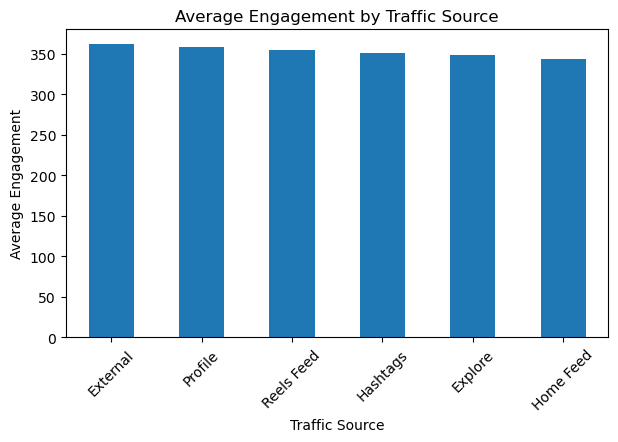

In [70]:
traffic_engagement = df.groupby('traffic_source')['total_engagement'].mean().sort_values(ascending=False)

traffic_engagement.plot(kind='bar', figsize=(7,4))
plt.title("Average Engagement by Traffic Source")
plt.xlabel("Traffic Source")
plt.ylabel("Average Engagement")
plt.xticks(rotation=45)
plt.show()

**Traffic Source Analysis - Key Observations**

- Engagement is similar across all traffic sources.
- External and Profile sources perform slightly better.
- Overall, traffic source has less impact than content quality.

# Perfomance Segmentation

- analyzes post perfomance categories to identify key characteristics that differeniates low-performing posts from viral content.

#### Understand Perfomance Buckets

In [82]:
df['performance_bucket_label'].value_counts()

performance_bucket_label
viral     7500
high      7500
low       7500
medium    7499
Name: count, dtype: int64

#### Engagement by Performance Buckets

- comparing total engagement across perfomance categories

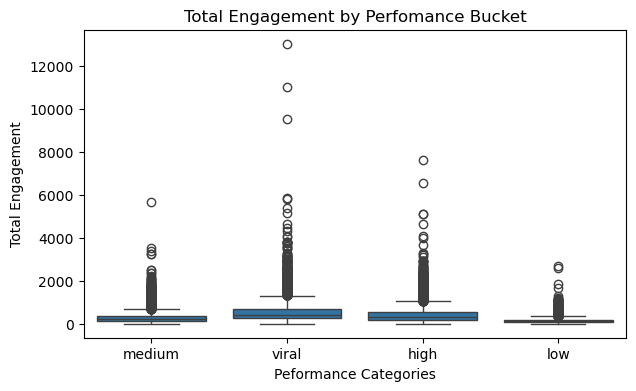

In [83]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='performance_bucket_label', y='total_engagement')
plt.title("Total Engagement by Perfomance Bucket")
plt.ylabel("Total Engagement")
plt.xlabel("Peformance Categories")
plt.show()

#### Reach vs Performance Bucket

- analyze how reach scales with post performance

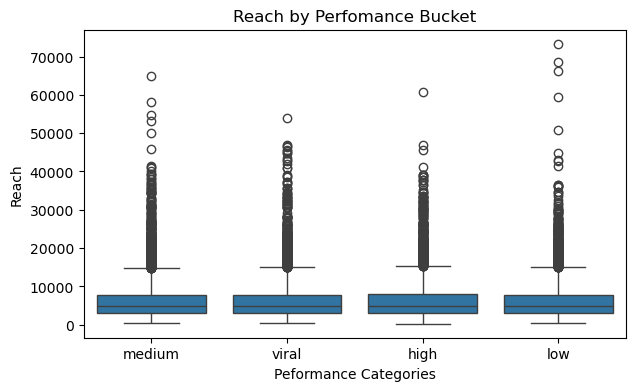

In [84]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='performance_bucket_label', y='reach')
plt.title("Reach by Perfomance Bucket")
plt.ylabel("Reach")
plt.xlabel("Peformance Categories")
plt.show()

#### Media Type vs Performance

- identify which media format are more common among high-performing posts.

In [88]:
#creates a cross tabulation
pd.crosstab(df['media_type'],df['performance_bucket_label'], normalize='columns')

performance_bucket_label,high,low,medium,viral
media_type,,,,
carousel,0.348533,0.3616,0.353914,0.352933
image,0.396533,0.3948,0.397386,0.401600
reel,0.254933,0.2436,0.248700,0.245467


#### Timing Patterns for Viral Posts

- analyzing when viral posts are typically published.

In [99]:
viral_posts = df[df['performance_bucket_label'] == 'viral']

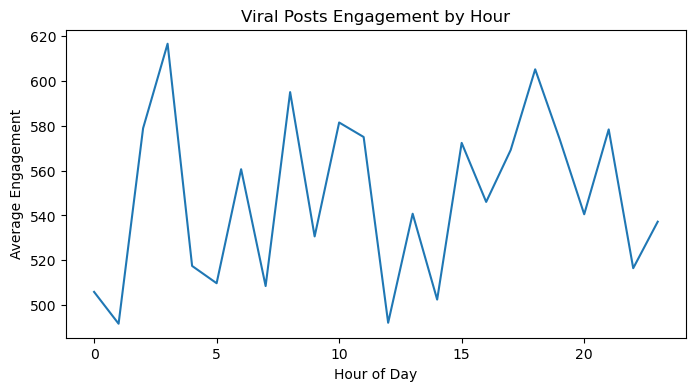

In [100]:
viral_posts.groupby('post_hour')['total_engagement'].mean().plot(figsize=(8,4))

plt.title("Viral Posts Engagement by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Engagement")
plt.show()

### Key Characteristics of Viral Posts

- Viral posts generate significantly higher total engagement compared to low, medium, and high-performing posts.
- They also achieve broader reach, indicating stronger amplification beyond the existing audience.
- Viral posts show greater variability, suggesting that exceptional performance is driven by standout content rather than consistency.
- Engagement for viral posts is higher during specific posting hours, aligning with peak audience activity periods.
- Overall, virality results from a combination of timing, strong engagement signals, and content resonance, not a single factor.

# Business Insights

- this section summarizes key insgihts derived from the analysis, focusing on factors that influence engagement, reach and content growth.

### Key Business Insights

1. Engagement levels are **similar across images, carousels, and reels**, indicating that content quality matters more than media format.
2. Certain content categories such as **Food, Photography, and Fashion** show higher viral potential due to extreme high-performing posts.
3. Engagement varies by **posting hour**, with early morning and evening time slots performing better.
4. Engagement remains **fairly consistent across weekdays**, with slightly higher performance on Sundays.
5. Caption length shows **no strong linear relationship** with engagement overly long captions do not guarantee better results.
6. Posts with a **moderate number of hashtags** achieve higher reach than those with very few or excessive hashtags.
7. Traffic source has a **limited impact on engagement**, with only minor differences across sources.
8. Viral posts generate **significantly higher engagement**, driven by strong audience interaction.
9. Viral performance is associated with **optimal timing and high-quality content**, rather than a single dominant factor.

# Strategic Recommendations

- based on analysis, the following recommendations are proposed to optimize content performance, engagement, and audience growth.

**1. Content Strategy**
- Focus on producing **high-quality, relevant content** rather than prioritizing a single media format.
- Increase content creation around **high-performing categories** such as Food, Photography, and Fashion while maintaining diversity.

**2. Posting Schedule Optimization**
- Prioritize posting during **early morning(3:00 - 5:00 AM) and evening hours(6:00 - 8:00 pm)**, when audience engagement is higher.
- Schedule important or campaign-related posts on **high-performing days**, particularly Sundays.(also recommend Tuesday)

**3. Caption Strategy**
- Use **clear and concise captions** that communicate value quickly.
- Avoid overly long captions unless they add meaningful context or storytelling.

**4. Hashtag Usage**
- Apply a **moderate number of relevant hashtags(5 - 10)** to maximize reach.
- Avoid excessive hashtag usage, which does not lead to proportional reach gains.

**5. Traffic Source Focus**
- Continue leveraging **feed-based discovery** (Reels Feed, Explore, Hashtags) while ensuring content quality remains the priority.
- Use **external and profile traffic** to drive highly engaged audiences.

**6. Engagement Growth Tactics**
- Encourage **saves and shares** through educational, inspirational, or value-driven content.
- Analyze viral posts regularly to replicate successful themes, timing, and messaging.